In [5]:
import tensorflow as tf
print("GPU Available: ", tf.config.list_physical_devices('GPU'))

GPU Available:  [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


###Setup Dataset

In [6]:
import os


training_dir = "F:\Program\All\Tomatoes-Classification-CNN-Conveyor\Dataset\Train"
validation_dir = "F:\Program\All\Tomatoes-Classification-CNN-Conveyor\Dataset\Validation"

In [7]:
# train_damaged = os.path.join(training_dir, 'damaged/')
# train_old = os.path.join(training_dir, 'old/')
# train_ripe = os.path.join(training_dir, 'ripe/')
# train_unripe = os.path.join(training_dir, 'unripe/')
# print("Count init train tomato")
# print("count of image damaged : ", len(os.listdir(train_damaged)))
# print("count of image old : ", len(os.listdir(train_old)))
# print("count of image ripe : ", len(os.listdir(train_ripe)))
# print("count of image unripe : ", len(os.listdir(train_unripe)))

# print("\n")

# validation_damaged = os.path.join(validation_dir, 'damaged/')
# validation_old = os.path.join(validation_dir, 'old/')
# validation_ripe = os.path.join(validation_dir, 'ripe/')
# validation_unripe = os.path.join(validation_dir, 'unripe/')
# print("Count init validation tomato")
# print("count of image damaged : ", len(os.listdir(validation_damaged)))
# print("count of image old : ", len(os.listdir(validation_old)))
# print("count of image ripe : ", len(os.listdir(validation_ripe)))
# print("count of image unripe : ", len(os.listdir(validation_unripe)))

###Pre Processing

In [8]:
import tensorflow as tf
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import regularizers

In [9]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    horizontal_flip=False,
    shear_range=0.2,
    fill_mode='nearest',
    width_shift_range=0.2,
    height_shift_range=0.2,
    zoom_range=0.1
)

valid_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    horizontal_flip=False,
    shear_range=0.2,
    fill_mode='nearest',
    width_shift_range=0.2,
    height_shift_range=0.2,
    zoom_range=0.1
)

In [10]:
train_generator = train_datagen.flow_from_directory(
    training_dir,
    batch_size = 32,
    target_size=(256,256),
    class_mode="categorical",
    seed=46
)

validation_generator = valid_datagen.flow_from_directory(
    validation_dir,
    batch_size = 32,
    target_size=(256,256),
    class_mode="categorical",
    seed=46
)

Found 1927 images belonging to 4 classes.


Found 168 images belonging to 4 classes.


In [11]:
label_map=(train_generator.class_indices)
print(label_map)

{'busuk': 0, 'matang': 1, 'mentah': 2, 'setengah matang': 3}


In [12]:
# optional untuk batas jika 99% stop pelatihan
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs = {}):
    if(logs.get('accuracy') > 0.99):
      print('\nAkurasi mencapai 99%')
      self.model.stop_training = True

callbacks = myCallback()

In [13]:
model = tf.keras.models.Sequential([
    #first layer
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', padding='same', kernel_initializer='he_normal', input_shape=(256, 256, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    #second layer
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', padding='same', kernel_initializer='he_normal'), tf.keras.layers.MaxPooling2D(2,2),
    #third layer
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', padding='same', kernel_initializer='he_normal'), tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', padding='same', kernel_initializer='he_normal'), tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', padding='same', kernel_initializer='he_normal'), tf.keras.layers.MaxPooling2D(2,2),
    #flatten dropout
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.3),
    #fully connected layers
    tf.keras.layers.Dense(128, activity_regularizer=regularizers.l2(0.001), activation='relu'),
    tf.keras.layers.Dropout(0.6),
    tf.keras.layers.Dense(4, activation='softmax')
])

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 256, 256, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 128, 128, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 128, 128, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 64, 64, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 64, 64, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 32, 32, 64)       0

###Core Convolutional Neural Network (CNN) Training

In [15]:
adam = Adam(learning_rate=0.001)

model.compile(
    loss='categorical_crossentropy',
    optimizer=adam,
    metrics=['accuracy']
)

In [16]:
history = model.fit(
    train_generator,
    steps_per_epoch=len(train_generator),
    epochs=100,
    validation_data=validation_generator,
    validation_steps=len(validation_generator)
)

Epoch 1/100
61/61 [==============================] - 28s 328ms/step - loss: 0.9604 - accuracy: 0.6092 - val_loss: 0.4698 - val_accuracy: 0.8810
Epoch 2/100
61/61 [==============================] - 20s 331ms/step - loss: 0.4156 - accuracy: 0.8941 - val_loss: 0.2390 - val_accuracy: 0.9464
Epoch 3/100
61/61 [==============================] - 21s 336ms/step - loss: 0.2726 - accuracy: 0.9486 - val_loss: 0.4611 - val_accuracy: 0.8214
Epoch 4/100
61/61 [==============================] - 21s 339ms/step - loss: 0.2254 - accuracy: 0.9616 - val_loss: 0.1499 - val_accuracy: 0.9821
Epoch 5/100
61/61 [==============================] - 21s 339ms/step - loss: 0.1505 - accuracy: 0.9850 - val_loss: 0.0975 - val_accuracy: 1.0000
Epoch 6/100
61/61 [==============================] - 21s 339ms/step - loss: 0.1309 - accuracy: 0.9891 - val_loss: 0.0831 - val_accuracy: 0.9940
Epoch 7/100
61/61 [==============================] - 26s 430ms/step - loss: 0.1063 - accuracy: 0.9933 - val_loss: 0.0715 - val_accuracy:

###Training Result

In [17]:
from sklearn.metrics import classification_report
test_generator = ImageDataGenerator(rescale=1./255)
test_data_generator=test_generator.flow_from_directory(
    # validation_dir,
    './Dataset/Test',
    target_size = (256,256),
    batch_size=30,
    shuffle=False
)

Found 80 images belonging to 4 classes.


In [18]:
label_map=(train_generator.class_indices)
print(label_map)

{'busuk': 0, 'matang': 1, 'mentah': 2, 'setengah matang': 3}


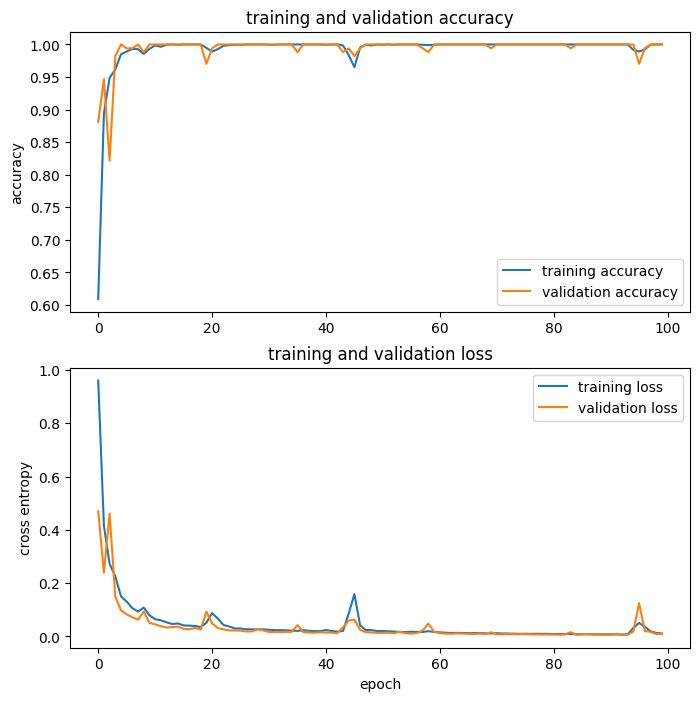

In [26]:
import tensorflow as tf
tf.keras.models.save_model(model, 'modelcnn_final.keras')

import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='training accuracy')
plt.plot(val_acc, label='validation accuracy')
plt.legend(loc='lower right')
plt.ylabel('accuracy')
plt.title('training and validation accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='training loss')
plt.plot(val_loss, label='validation loss')
plt.legend(loc='upper right')
plt.ylabel('cross entropy')
plt.title('training and validation loss')
plt.xlabel('epoch')
plt.show()

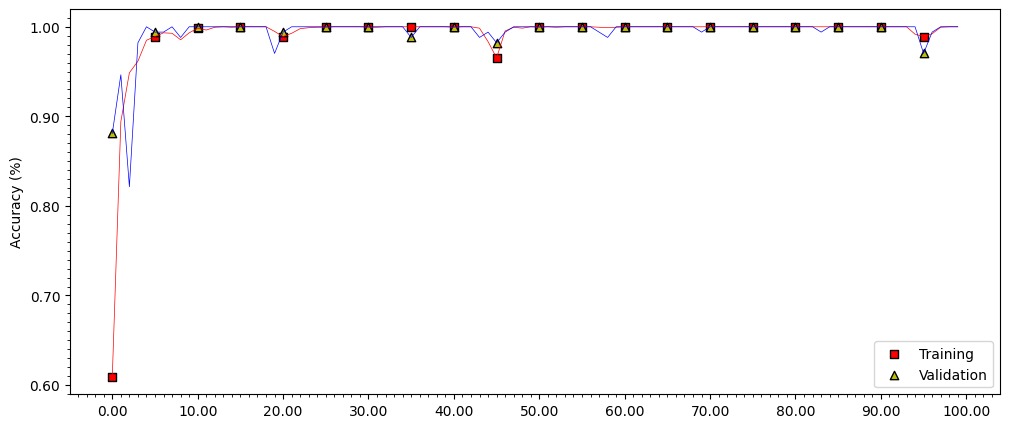

In [56]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes
from mpl_toolkits.axes_grid1.inset_locator import mark_inset
import random
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)

fig, ax = plt.subplots(figsize=(12,5))
x = np.arange(0, len(acc))
hop = 5
ax.plot(acc     , color='r', linewidth=0.5)
ax.plot(val_acc , color='b', linewidth=0.5)

ax.scatter(x[::hop], acc     [::hop], marker='s', color='r', edgecolors='k', label='Training'  )
ax.scatter(x[::hop], val_acc [::hop], marker='^', color='y', edgecolors='k', label='Validation')
ax.legend(loc='lower right')
ax.set_ylabel('Accuracy (%)')

ax.yaxis.set_major_locator(MultipleLocator(0.1))
ax.yaxis.set_major_formatter('{x:.2f}')
ax.yaxis.set_minor_locator(MultipleLocator(0.01))
ax.xaxis.set_major_locator(MultipleLocator(10))
ax.xaxis.set_major_formatter('{x:.2f}')
ax.xaxis.set_minor_locator(MultipleLocator(1))

In [27]:
model.evaluate(validation_generator)

6/6 [==============================] - 2s 243ms/step - loss: 0.0096 - accuracy: 1.0000


[0.009577379561960697, 1.0]

3/3 [==============================] - 0s 184ms/step


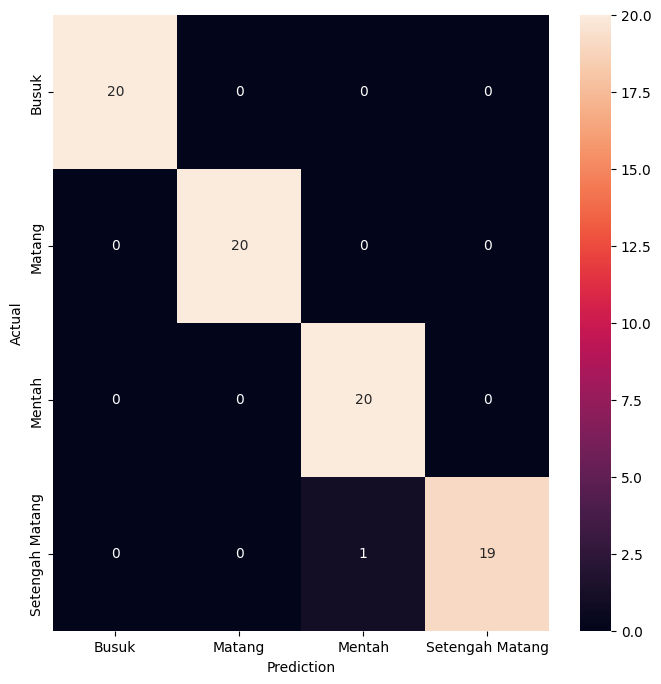

In [58]:
import sklearn
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Define your custom labels
labels = ["Busuk", "Matang", "Mentah", "Setengah Matang"]

# Generate predictions (assuming you have already defined label_map and model)
prediction = model.predict(test_data_generator)
y_pred = np.argmax(prediction, axis=1)

# Generate confusion matrix
conf_matrix = confusion_matrix(test_data_generator.classes, y_pred)

plt.figure(figsize=(8, 8))
sns.heatmap(conf_matrix, annot=True, xticklabels=labels, yticklabels=labels)
plt.ylabel("Actual")
plt.xlabel("Prediction")
plt.show()

In [29]:
label_map=(train_generator.class_indices)
print(label_map)

{'busuk': 0, 'matang': 1, 'mentah': 2, 'setengah matang': 3}


In [23]:
from sklearn.metrics import classification_report
print(classification_report(test_data_generator.classes,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        20
           1       1.00      1.00      1.00        20
           2       0.95      1.00      0.98        20
           3       1.00      0.95      0.97        20

    accuracy                           0.99        80
   macro avg       0.99      0.99      0.99        80
weighted avg       0.99      0.99      0.99        80



###Error Analysis

In [24]:
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report

y_pred = model.predict(validation_generator)
y_true = validation_generator.classes

confusion_mtx = confusion_matrix(y_true, np.argmax(y_pred, axis=1))
print(confusion_mtx)

report = classification_report(y_true, np.argmax(y_pred, axis=1))
print(report)

6/6 [==============================] - 1s 238ms/step
[[ 3 17  4  4]
 [15 36 12 17]
 [ 8 14  6  2]
 [ 2 13  8  7]]
              precision    recall  f1-score   support

           0       0.11      0.11      0.11        28
           1       0.45      0.45      0.45        80
           2       0.20      0.20      0.20        30
           3       0.23      0.23      0.23        30

    accuracy                           0.31       168
   macro avg       0.25      0.25      0.25       168
weighted avg       0.31      0.31      0.31       168



###Test Real Case


In [25]:
from google.colab import files
from keras.preprocessing import image
import numpy as np

uploaded = files.upload()

for fn in uploaded.keys():
    path = fn
    img = image.load_img(path, target_size=(256, 256))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = x / 255.0

    predictions = model.predict(x)
    class_index = np.argmax(predictions, axis=1)[0]

    class_label = list(label_map.keys())[list(label_map.values()).index(class_index)]

    # Mendapatkan nilai probabilitas tertinggi
    confidence = np.max(predictions) * 100  # Mengonversi ke persentase

    # Menampilkan gambar
    plt.imshow(img)
    plt.axis('off')
    plt.show()

    print(f'Gambar {fn} termasuk ke dalam Tomat kelas {class_index}: {class_label}')
    print(f'Confidence: {confidence:.2f}%')

ModuleNotFoundError: No module named 'google.colab'

###Test Case Output G-Drive

In [ ]:
import time
from google.colab import files
from keras.preprocessing import image
import numpy as np
import json

uploaded = files.upload()

for fn in uploaded.keys():
    path = fn
    img = image.load_img(path, target_size=(256, 256))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = x / 255.0

    start_time = time.time()

    predictions = model.predict(x)
    class_index = np.argmax(predictions, axis=1)[0]
    class_label = list(label_map.keys())[list(label_map.values()).index(class_index)]

    end_time = time.time()
    elapsed_time = end_time - start_time
    class_index = int(class_index)

    accuracy = np.max(predictions) * 100

    data = {
        "class_index": class_index,
        "class_label": class_label,
        "accuracy": f'{accuracy:.2f}%',
        "elapsed_time": f'{elapsed_time:.4f} seconds'
    }

    json_data = json.dumps(data, indent=4)
    print(json_data)

Saving oldVal2.jpg to oldVal2.jpg
1/1 [==============================] - 0s 38ms/step
{
    "class_index": 1,
    "class_label": "old",
    "accuracy": "99.98%",
    "elapsed_time": "0.0945 seconds"
}


In [ ]:
from google.colab import drive
import json

file_path = "/content/drive/My Drive/Colab Notebooks/projects/tomato_project/output/result.json"

with open(file_path, 'w') as json_file:
    json.dump(data, json_file)

print(f'File {file_path} \n berhasil diunggah ke Google Drive.')

File /content/drive/My Drive/Colab Notebooks/projects/tomato_project/output/result.json 
 berhasil diunggah ke Google Drive.


In [ ]:
from keras.preprocessing import image
import numpy as np
import json

file_path = "/content/drive/MyDrive/Colab Notebooks/projects/tomato_project/input/Feb_17_2024_20_14_29.jpg"

img = image.load_img(file_path, target_size=(256, 256))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = x / 255.0

predictions = model.predict(x)
class_index = np.argmax(predictions, axis=1)[0]
class_label = list(label_map.keys())[list(label_map.values()).index(class_index)]

start_time = time.time()
end_time = time.time()
elapsed_time = end_time - start_time

accuracy = np.max(predictions) * 100

data = {
    "class_index": int(class_index),
    "class_label": class_label,
    "accuracy": f'{accuracy:.2f}%',
    "elapsed_time": f'{elapsed_time:.4f} seconds'
}

json_data = json.dumps(data, indent=4)
print(json_data)

from google.colab import drive
import json

file_path = "/content/drive/My Drive/Colab Notebooks/projects/tomato_project/output/result.json"

with open(file_path, 'w') as json_file:
    json.dump(data, json_file)

print(f'File {file_path} \n berhasil diunggah ke Google Drive.')


1/1 [==============================] - 0s 85ms/step
{
    "class_index": 3,
    "class_label": "unripe",
    "accuracy": "98.36%",
    "elapsed_time": "0.0001 seconds"
}
File /content/drive/My Drive/Colab Notebooks/projects/tomato_project/output/result.json 
 berhasil diunggah ke Google Drive.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')